In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Homework 2

In this homework you will implement a numerical approach to gradient descent and use it to implement the perceptron algorithm.  That will take place in stages described below.  But we'll start by describing how to perform gradient descent numerically.

### The method of finite differences

Given a function $f(x)$, the analytical approach to gradient descent - i.e., to finding the value of $x$ that minimizes $f(x)$ - is to compute $f'(x)$ and iterate as follows, where $\alpha \in (0, 1]$ is the learning rate:
* x = 0
* while not converged:
    * $x = x - \alpha f'(x)$
    
If you cannot compute $f'(x)$ analytically, you can estimate it as follows, for sufficiently small $\epsilon$:

$f'(x) \approx \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon}$

The *method of finite differences* makes the assumption that over very small intervals the function behaves linearly and the slope of the tangent line can be estimated as the difference between function values at the ends of the interval divided by the interval width.

For example, the slope of $f(x) = x^2$ at $x = 1$ can be estimated as $f'(1) = \frac{(1 + 0.001)^2 - (1 - 0.001)^2}{2 * 0.001}$.

In [4]:
e = 0.001
(math.pow(1 + e, 2) - math.pow(1 - e, 2))/(2*e)

1.9999999999998352

Note that the number above is very close to what you would get analytically by taking derivatives: $f'(x) = 2x$ so $f'(1) = 2*1 = 2$.

You'll use the method of finite differences to compute the derivative of a loss function with respect to the weights of a perceptron.

Below is a simple implementation of the method of finite differences for a univariate function.  It is overly simple, running for a fixed number of iterations, and assuming constants for $\epsilon$ and $\alpha$, but it works for simple cases.

In [5]:
def fd_demo(f, x0):
    e = 0.001
    a = 0.01
    x = x0
    for _ in range(1000):
        g = (f(x + e) - f(x - e)) / (2*e)
        x = x - a * g
    return x

In [6]:
# x*x is minimized at 0
f = lambda x: x * x
fd_demo(f, 2)

3.365934714445534e-09

In [7]:
f(8)

64

In [8]:
# sin(x) is minimized at lots of points, the closest to 2 is 3pi/2
f = lambda x: math.sin(x)
print(fd_demo(f, 2))
print(math.pi * 3 / 2)

4.711986618234112
4.71238898038469


### Perceptron class

Below is a simple Perceptron class that you can use in this assignment.  Feel free to use it as is, make changes, or throw it out and write your own.  It creates a weight vector with small random numbers when initialized, and has methods to compute the activation for an input and to produce a binary class label for an input.

Note that the class below does not maintain an explicit bias term $b$.  You can add one or, better yet, make sure that all inputs, $x$, have a 1 in one of the positions.

In [9]:
class Perceptron:

    def __init__(self, n):
        """
        n (int) - The length of x vectors that the classifier will process.
        """

        # Start with weights uniformly chosen from the range [-0.5, 0.5]
        self.weights = (np.random.rand(n) - 0.5).tolist()

    def activation(self, x):
        return np.dot(x, self.weights)

    def predict(self, x):
        return 1 if self.activation(x) > 0 else -1


### Task 1: The hinge loss

Fill in the function below to compute the hinge loss.  Recall that the hinge loss is 0 if the activation and the class label have the same sign, otherwise it is -y * activation.

In [10]:
def loss_hinge(y, activation):
  if (y * activation) > 0:
    loss_h = 0
  else:
    loss_h = (-y * activation)

  return loss_h


### Task 2: One step of gradient descent

Fill in the function below which takes the following arguments:
* clf - An instance of the perceptron class above
* x - A training instance
* y - The corresponding true class label
* learning_rate - A learning rate in the range (0, 1]
* loss_fn - A function that takes as input the true class label and the activation and returns a real number which is the loss on that example
* epsilon - The delta to use when using the method of finite differences

The function must return a new set of weights to use in the perceptron after performing one step of gradient descent update using the training example and loss function.  To do that it will:
* Loop over each of the weights
* Compute the partial derivative of the loss with respect to the weight using the method of finite differences
* Use the computed gradient (the list of partials with respect to each of the weights) to compute a new weight vector as $w = w - \alpha g$ where $w$ is the weight vector, $\alpha$ is the learning rate, and $g$ is the computed gradient.
* Return the new weight vector

**Note:** Be careful not to modify the weights of the preceptron in place in the routine below.

In [11]:
def gd_step(clf, x, y, learning_rate, loss_fn, epsilon = 0.001):
    new_weights = []
    for i in range(len(x)):
        w = clf.weights[i]

        clf.weights[i] = w + epsilon
        l_plus = loss_fn(y, clf.activation(x))

        clf.weights[i] = w - epsilon
        l_minus = loss_fn(y, clf.activation(x))

        clf.weights[i] = w

        g = (l_plus - l_minus)/(2*epsilon)
        new_weight = w - learning_rate*g
        new_weights.append(new_weight)

    return new_weights

### Some training data

The code below generates a simple 2D dataset of n positive examples followed by n negative examples.  The cell after that plots them.  The code also prepends a 1 in each example so that the bias term will simply correspond to the first weight.

In [12]:
n = 10
X = np.concatenate((np.random.rand(n, 2) + 1,
                    np.random.rand(n, 2)))
X = np.hstack((np.expand_dims(np.ones(2*n), 1), X))
Y = [1] * n + [-1] * n
colors = c = ['r'] * n + ['g'] * n

# Randomize the order of the instances just for fun
rng = np.random.default_rng()
state = rng.__getstate__()
rng.shuffle(X)
rng.__setstate__(state)
rng.shuffle(Y)
rng.__setstate__(state)
rng.shuffle(colors)

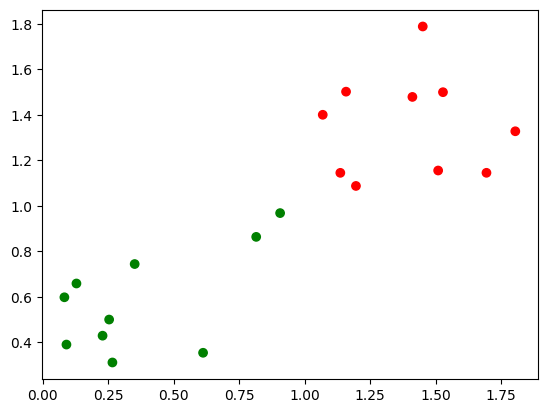

In [13]:
plt.scatter(X[:,1], X[:,2], c = colors)

### Task 3: Full gradient descent

If you've done everthing above correctly, the code below will perform gradient descent to train the classifier.

Modify this code so that it runs until one epoch produces no classification errors rather than running for a fixed number of iterations.

In [32]:
clf = Perceptron(3)

for epoch in range(100):
    i = clf.weights.copy()
    for x, y in zip(X, Y):
        clf.weights = gd_step(clf, x, y, 0.01, loss_hinge)
    if i == clf.weights:
      print("epoch", epoch)
      break

print(clf.weights)

epoch 17
[-0.036612178605617315, 0.01553815507016413, 0.018951302703344754]


### Task 4: Plot some hyperplanes

Run full gradient descent 5 times and write a routine to convert the weights into slope/intercept form.  Then use the function below to plot the hyperplanes learned by the perceptron along with the data in one graph.  The second cell below shows how that can be done.  Write a paragraph explaining what you see in the plot, touching on how much variation there is from run to run and whether the separators seem like "good" ones.

In [15]:
def weights_to_slope_intercept(weights):
  slope = -weights[1]/weights[2]
  intercept = -weights[0]/weights[2]
  return slope, intercept

In [17]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

-0.8198990493366859 1.9319082798015546


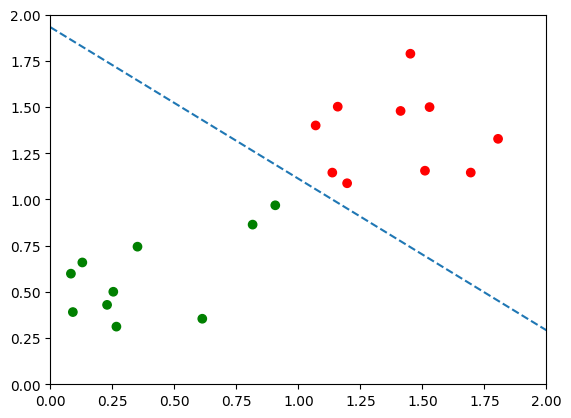

In [33]:
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.scatter(X[:,1], X[:,2], c = colors)
# abline(-1, 2)
# abline(2, 0)
slope, intercept = weights_to_slope_intercept(clf.weights)
print(slope, intercept)
abline(slope, intercept)

In [34]:
def full_GD():
  clf = Perceptron(3)

  for epoch in range(100):
    i = clf.weights.copy()
    for x, y in zip(X, Y):
        clf.weights = gd_step(clf, x, y, 0.01, loss_hinge)
    if i == clf.weights:
      print("epoch", epoch)
      break;

  return(clf.weights)

In [19]:
def plot(slope, intercept):
  plt.xlim([0, 2])
  plt.ylim([0, 2])
  plt.scatter(X[:,1], X[:,2], c = colors)
  abline(slope, intercept)

epoch 18
[-0.24174575162666426, -0.05294317762068153, 0.2966236223905475]
0.1784860463708256 0.8149915697151433
epoch 7
[-0.26550582160347524, 0.048320222651112854, 0.21188549843920748]
-0.22804874805991743 1.2530627322740169
epoch 26
[-0.07555979326994319, 0.11121509636698719, -0.027922546729612405]
3.9829854147595145 -2.7060494875924253
epoch 22
[-0.10669162440578209, -0.013564173291354412, 0.11623841643583187]
0.11669268824599278 0.917868873968014
epoch 5
[-0.10203178051534045, -0.013644965255683733, 0.11582964080807351]
0.11780201648292306 0.8808779842838698


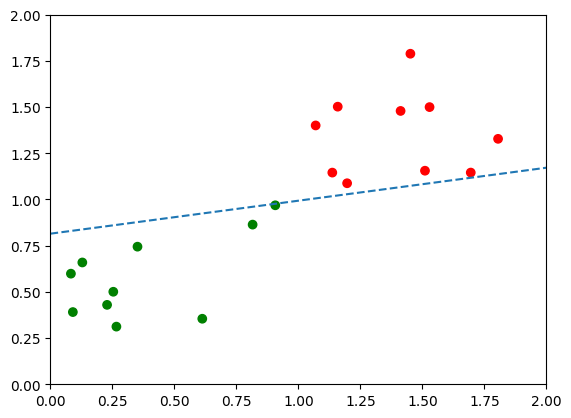

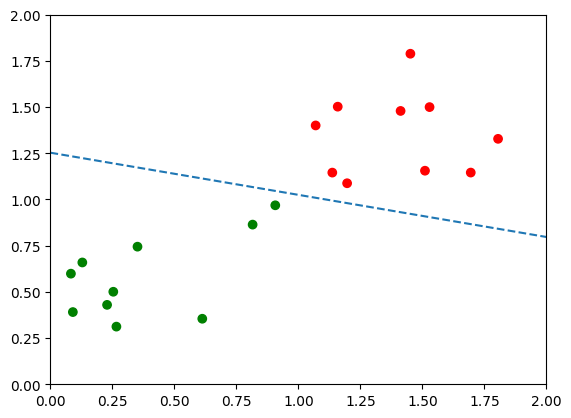

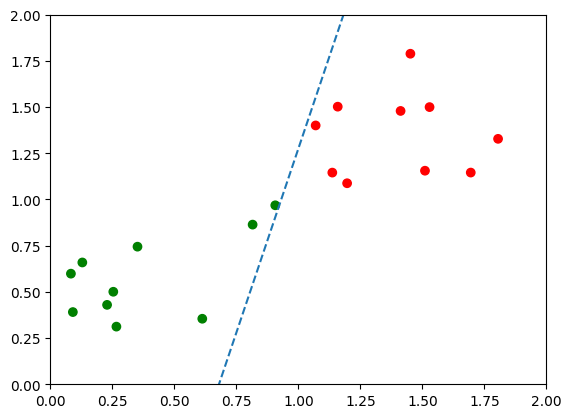

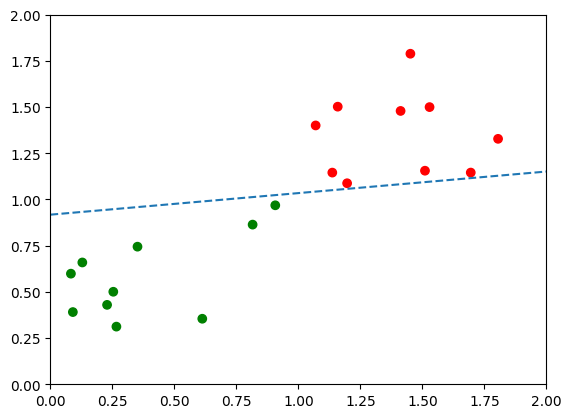

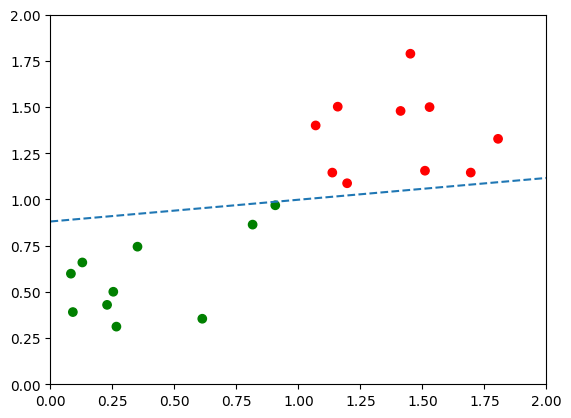

In [51]:
for _ in range(5):
  new_wt = full_GD()
  print(new_wt)
  slope, intercept = weights_to_slope_intercept(new_wt)
  plt.figure()
  plt.xlim([0, 2])
  plt.ylim([0, 2])
  plt.scatter(X[:,1], X[:,2], c = colors)
  print(slope, intercept)
  abline(slope, intercept)

### Task 5: Do task 4 again with a new loss

Repeat The previous task, generating 5 plots of the separators correspond to hyperplanes, but this time use the loss function below.

How are the results different?  Write a brief paragraph explaining why the results look different.

In [55]:
def loss_hinge_margin(y, activation):
    return 0 if -y * activation > 1 else -y * activation + 1

[8.37946183357632, 13.735127069693561, 12.935313459056065]
-1.0618317919522502 -0.6477973541267239
[9.827326196894301, 13.546104139437618, 13.120331705002636]
-1.0324513468110443 -0.7490150720158433
[8.801601751767762, 13.47000383139284, 12.506394643141817]
-1.0770493188282235 -0.7037681124667158
[-10.480759239871714, -3.867959734116386, -6.217960628645175]
-0.6220624357602553 -1.685562174772946
[9.616622445964714, 13.67943220639878, 12.77410039510119]
-1.0708724515461598 -0.7528218934033621


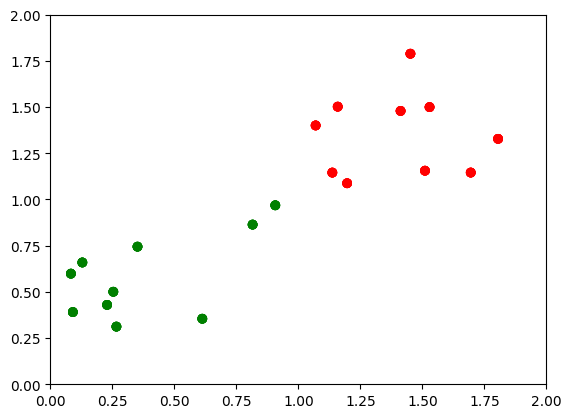

In [57]:
for _ in range(5):
  clf = Perceptron(3)
  for epoch in range(100):
    i = clf.weights
    for x, y in zip(X, Y):
        clf.weights = gd_step(clf, x, y, 0.01, loss_hinge_margin)
    if i == clf.weights:
      print("epoch", epoch)
      break
  print(clf.weights)
  slope, intercept = weights_to_slope_intercept(clf.weights)
  # plt.figure()
  plt.xlim([0, 2])
  plt.ylim([0, 2])
  plt.scatter(X[:,1], X[:,2], c = colors)
  print(slope, intercept)
  abline(slope, intercept)

# for _ in range(5):
#   clf = Perceptron(3)
#   for epoch in range(100):
#     i = clf.weights.copy()
#     for x, y in zip(X, Y):
#         clf.weights = gd_step(clf, x, y, 0.01, loss_hinge_margin)
#     if i == clf.weights:
#       break
#   slope, intercept = weights_to_slope_intercept(clf.weights)
#   plt.figure()
#   plot(slope, intercept)

# for _ in range(5):
#     new_wt = full_GD(3)
#